### Importación de datos



In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



#### En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [ ]:
total_earn1 = tienda['Precio'].sum()
total_earn1

np.float64(1150880400.0)

In [ ]:
total_earn2 = tienda2['Precio'].sum()
total_earn2

np.float64(1116343500.0)

In [ ]:
total_earn3 = tienda3['Precio'].sum()
total_earn3

np.float64(1098019600.0)

In [ ]:
total_earn4 = tienda4['Precio'].sum()
total_earn4

np.float64(1038375700.0)

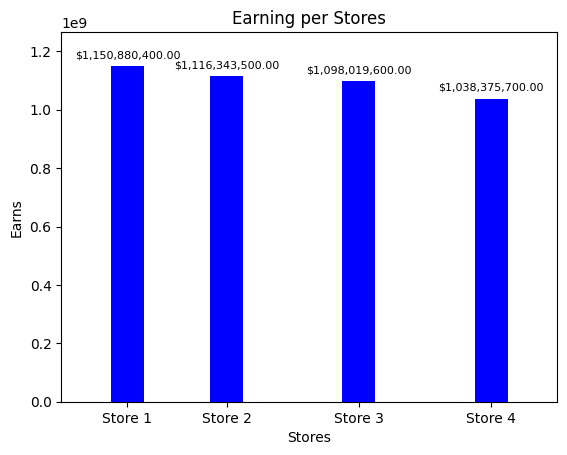

In [ ]:
from numpy import positive
stores = ["Store 1", "Store 2", "Store 3", "Store 4"]
earnings = [total_earn1, total_earn2, total_earn3, total_earn4]
positions = [6.5, 9.5, 13.5, 17.5]

plt.bar(positions, earnings, color='blue', width=1.0)
plt.xticks(positions, stores)

for x, y in zip(positions, earnings):
  plt.text(x, y +2e7, f"${y:,.2f}", ha='center', va='bottom', fontsize=8)

plt.xlabel('Stores')
plt.xlim(min(positions)-2, max(positions)+2)
plt.ylabel('Earns')
plt.ylim(0, max(earnings) *1.1)
plt.title('Earning per Stores')
plt.show()

#### ***The store with most sales was the Store 1 with 1.150.880.400,00 $***



```
# This is formatted as code
```

# 2. Ventas por categoría

## **Description**

#### **En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.**

In [ ]:
category_sales1 = tienda.groupby('Categoría del Producto')['Producto'].count().reset_index(name='Sales')
category_sales1

,Categoría del Producto,Sales
0,Artículos para el hogar,171
1,Deportes y diversión,284
2,Electrodomésticos,312
3,Electrónicos,448
4,Instrumentos musicales,182
5,Juguetes,324
6,Libros,173
7,Muebles,465


In [ ]:
category_sales2 = tienda2.groupby('Categoría del Producto')['Producto'].count().reset_index(name='Sales')
category_sales2

,Categoría del Producto,Sales
0,Artículos para el hogar,181
1,Deportes y diversión,275
2,Electrodomésticos,305
3,Electrónicos,422
4,Instrumentos musicales,224
5,Juguetes,313
6,Libros,197
7,Muebles,442


In [ ]:
category_sales3 = tienda3.groupby('Categoría del Producto')['Producto'].count().reset_index(name='Sales')
category_sales3

,Categoría del Producto,Sales
0,Artículos para el hogar,177
1,Deportes y diversión,277
2,Electrodomésticos,278
3,Electrónicos,451
4,Instrumentos musicales,177
5,Juguetes,315
6,Libros,185
7,Muebles,499


In [ ]:
category_sales4 = tienda4.groupby('Categoría del Producto')['Producto'].count().reset_index(name='Sales')
category_sales4

,Categoría del Producto,Sales
0,Artículos para el hogar,201
1,Deportes y diversión,277
2,Electrodomésticos,254
3,Electrónicos,451
4,Instrumentos musicales,170
5,Juguetes,338
6,Libros,187
7,Muebles,480


#### **La categorías más vendidas fueron muebles y electrónicos**

#### **Visualización gráfica**

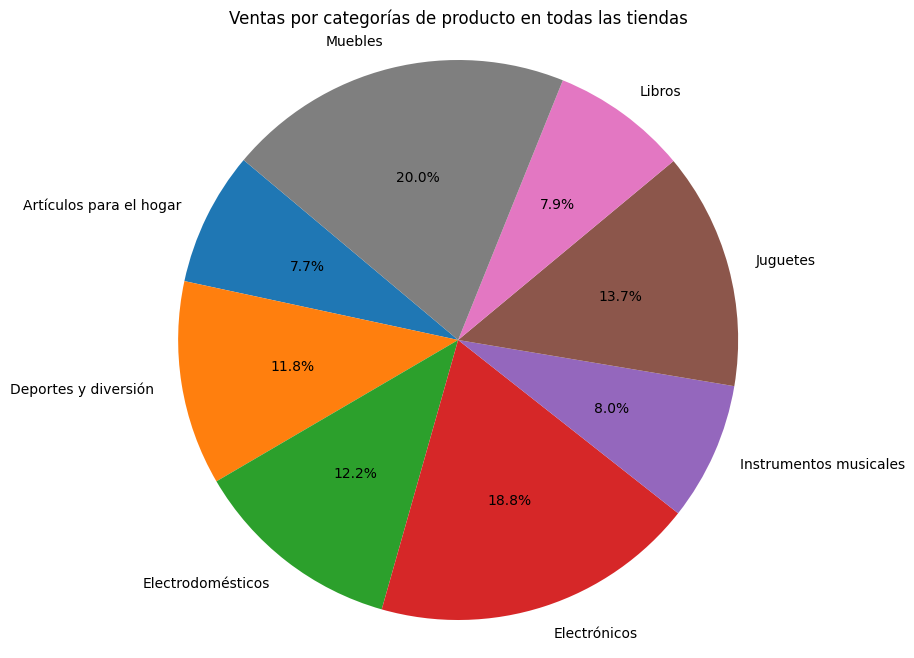

In [ ]:
total_sales = pd.concat([
    category_sales1,
    category_sales2,
    category_sales3,
    category_sales4
    ]).groupby('Categoría del Producto')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 8))
plt.pie(total_sales["Sales"], labels=total_sales["Categoría del Producto"], autopct="%1.1f%%", startangle=140)
plt.title("Ventas por categorías de producto en todas las tiendas")
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


#### **En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.**

In [ ]:
average = tienda['Calificación'].mean()
print(f'Tienda 1 : {average:.2f}')

Tienda 1 : 3.98


In [ ]:
average2 = tienda2['Calificación'].mean()
print(f'Tienda 2 : {average2:.2f}')

Tienda 2 : 4.04


In [ ]:
average3 = tienda3['Calificación'].mean()
print(f'Tienda 3 : {average3:.2f}')

Tienda 3 : 4.05


In [ ]:
average4 = tienda4['Calificación'].mean()
print(f"Tienda 4 : {average4:.2f}")

Tienda 4 : 4.00


#### **La tienda con mejor calificación es la tienda número 3, con un promedio de 4.05**

#### **Visualización gráfica**

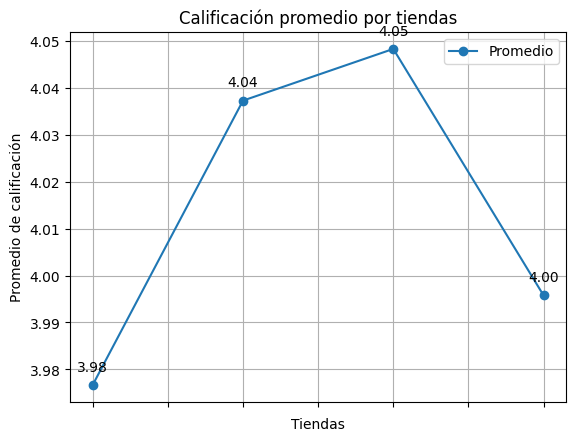

In [ ]:
total_average = [average, average2, average3, average4]
total_stores = [tienda, tienda2, tienda3, tienda4]
data = {'Tienda': total_stores, 'Promedio': total_average}
df = pd.DataFrame(data)

ax = df.plot(kind='line', x='Tienda', y='Promedio', marker='o')

for i, txt in enumerate(df['Promedio']):
  ax.annotate(f'{txt:.2f}', (i, txt), textcoords='offset points', xytext=(0, 10), ha='center')

plt.title('Calificación promedio por tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Promedio de calificación')
plt.grid(True)
plt.show()

# 4. Productos más y menos vendidos

#### **En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.**

In [ ]:
#Cuentos los productos por grupos.

sales = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)

#Cálculo el producto más vendido.
max_sales = sales.idxmax()
max_units = sales.max()

print(f'El producto más vendido fue {max_sales} con {max_units} ventas.')

#Cálculo el producto menos vendido.
min_sales = sales.idxmin()
min_units = sales.min()

print(f'El producto menos vendido fue {min_sales} con {min_units} ventas.')

El producto más vendido fue Armario con 60 ventas.
El producto menos vendido fue Celular ABXY con 33 ventas.


In [ ]:
#Cuentos los productos por grupos.

sales = tienda2.groupby('Producto')['Producto'].count().sort_values(ascending=False)

#Cálculo el producto más vendido.
max_sales = sales.idxmax()
max_units = sales.max()

print(f'El producto más vendido fue {max_sales} con {max_units} ventas.')

#Cálculo el producto menos vendido.
min_sales = sales.idxmin()
min_units = sales.min()

print(f'El producto menos vendido fue {min_sales} con {min_units} ventas.')

El producto más vendido fue Iniciando en programación con 65 ventas.
El producto menos vendido fue Juego de mesa con 32 ventas.


In [ ]:
#Cuentos los productos por grupos.

sales = tienda3.groupby('Producto')['Producto'].count().sort_values(ascending=False)

#Cálculo el producto más vendido.
max_sales = sales.idxmax()
max_units = sales.max()

print(f'El producto más vendido fue {max_sales} con {max_units} ventas.')

#Cálculo el producto menos vendido.
min_sales = sales.idxmin()
min_units = sales.min()

print(f'El producto menos vendido fue {min_sales} con {min_units} ventas.')

El producto más vendido fue Kit de bancas con 57 ventas.
El producto menos vendido fue Bloques de construcción con 35 ventas.


In [ ]:
#Cuentos los productos por grupos.

sales = tienda4.groupby('Producto')['Producto'].count().sort_values(ascending=False)

#Cálculo el producto más vendido.
max_sales = sales.idxmax()
max_units = sales.max()

print(f'El producto más vendido fue {max_sales} con {max_units} ventas.')

#Cálculo el producto menos vendido.
min_sales = sales.idxmin()
min_units = sales.min()

print(f'El producto menos vendido fue {min_sales} con {min_units} ventas.')

El producto más vendido fue Cama box con 62 ventas.
El producto menos vendido fue Guitarra eléctrica con 33 ventas.


#### **Visualizacióm gráfica**

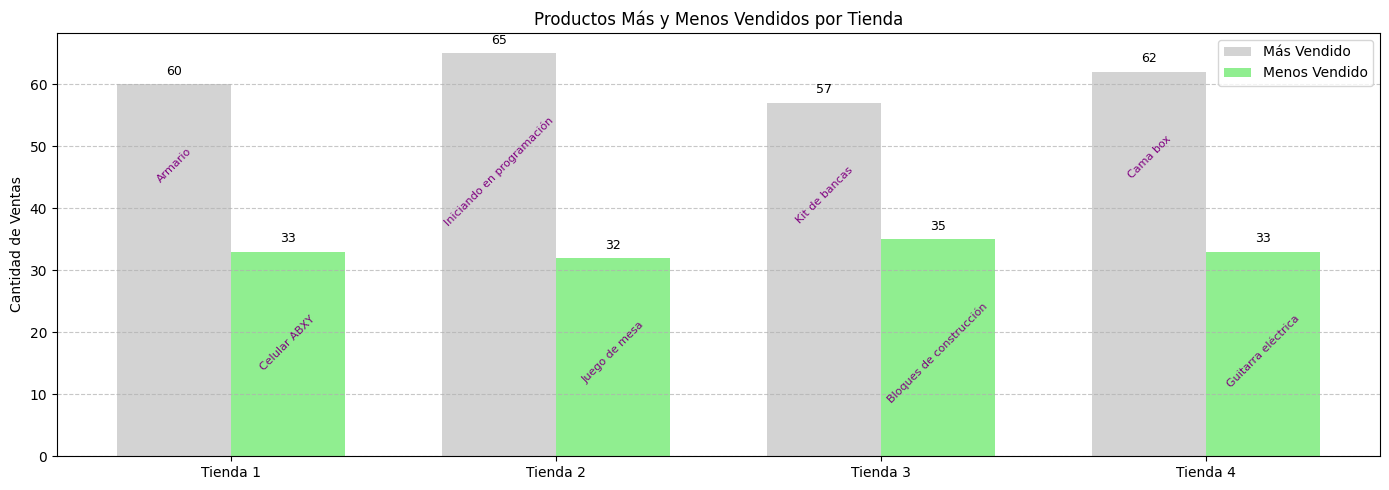

In [92]:
import numpy as np

def get_product_sales_data(df, store_name):
    ventas = df.groupby('Producto')['Producto'].count().sort_values(ascending=False)
    mas_vendido_name = ventas.idxmax()
    mas_vendido_count = ventas.max()
    menos_vendido_name = ventas.idxmin()
    menos_vendido_count = ventas.min()
    return {
        'Store': store_name,
        'Producto': [mas_vendido_name, menos_vendido_name],
        'Cantidad': [mas_vendido_count, menos_vendido_count],
        'Tipo': ['Más Vendido', 'Menos Vendido']
    }

tienda1_df = pd.read_csv(url)

data_tienda1 = get_product_sales_data(tienda1_df, 'Tienda 1')
data_tienda2 = get_product_sales_data(tienda2, 'Tienda 2')
data_tienda3 = get_product_sales_data(tienda3, 'Tienda 3')
data_tienda4 = get_product_sales_data(tienda4, 'Tienda 4')


combined_data = pd.concat([
    pd.DataFrame(data_tienda1),
    pd.DataFrame(data_tienda2),
    pd.DataFrame(data_tienda3),
    pd.DataFrame(data_tienda4)
]).reset_index(drop=True)


fig, ax = plt.subplots(figsize=(14, 5))

stores = combined_data['Store'].unique()
product_types = combined_data['Tipo'].unique()

width = 0.35
ind = np.arange(len(stores))


mas_vendido_counts = [combined_data[(combined_data['Store'] == s) & (combined_data['Tipo'] == 'Más Vendido')]['Cantidad'].iloc[0] for s in stores]
rects1 = ax.bar(ind - width/2, mas_vendido_counts, width, label='Más Vendido', color='lightgrey')

menos_vendido_counts = [combined_data[(combined_data['Store'] == s) & (combined_data['Tipo'] == 'Menos Vendido')]['Cantidad'].iloc[0] for s in stores]
rects2 = ax.bar(ind + width/2, menos_vendido_counts, width, label='Menos Vendido', color='lightgreen')


for i, store in enumerate(stores):
    mas_vendido_product = combined_data[(combined_data['Store'] == store) & (combined_data['Tipo'] == 'Más Vendido')]['Producto'].iloc[0]
    menos_vendido_product = combined_data[(combined_data['Store'] == store) & (combined_data['Tipo'] == 'Menos Vendido')]['Producto'].iloc[0]

    ax.text(ind[i] - width/2, mas_vendido_counts[i] + 1, f'{mas_vendido_counts[i]}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(ind[i] + width/2, menos_vendido_counts[i] + 1, f'{menos_vendido_counts[i]}', ha='center', va='bottom', fontsize=9, color='black')


    ax.text(ind[i] - width/2, mas_vendido_counts[i] - 10, f'{mas_vendido_product}', ha='center', va='top', fontsize=8, color='purple', rotation=45)
    ax.text(ind[i] + width/2, menos_vendido_counts[i] - 10, f'{menos_vendido_product}', ha='center', va='top', fontsize=8, color='purple', rotation=45)


ax.set_ylabel('Cantidad de Ventas')
ax.set_title('Productos Más y Menos Vendidos por Tienda')
ax.set_xticks(ind)
ax.set_xticklabels(stores)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda

#### **En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.**

In [109]:
avg_delivery_cost1 = tienda['Costo de envío'].mean()
print(f'La tienda 1 tiene un costo de : {avg_delivery_cost1:.2f}$')

La tienda 1 tiene un costo de : 26018.61$


In [108]:
avg_delivery_cost2 = tienda2['Costo de envío'].mean()
print(f'La tienda 2 tiene un costo de : {avg_delivery_cost2:.2f}$')

La tienda 2 tiene un costo de : 25216.24$


In [107]:
avg_delivery_cost3 = tienda3['Costo de envío'].mean()
print(f'La tienda 3 tiene un costo de : {avg_delivery_cost3:.2f}$')

La tienda 3 tiene un costo de : 24805.68$


In [106]:
avg_delivery_cost4 = tienda4['Costo de envío'].mean()
print(f'La tienda 4 tiene un costo de : {avg_delivery_cost4:.2f}$')

La tienda 4 tiene un costo de : 23459.46$


#### **Visualización gráfica**

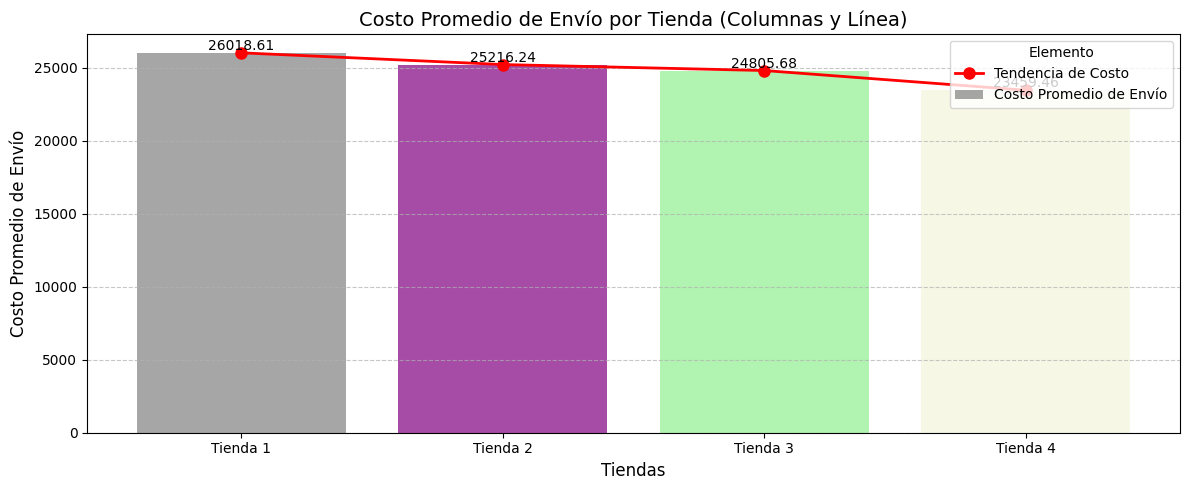

In [118]:


df_costos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo Promedio de Envío': [avg_delivery_cost1, avg_delivery_cost2, avg_delivery_cost3, avg_delivery_cost4]
})

plt.figure(figsize=(12, 5))

stores = df_costos['Tienda']
costs = df_costos['Costo Promedio de Envío']
x_positions = np.arange(len(stores))
colors = ['grey', 'purple', 'lightgreen', 'beige']


plt.bar(x_positions, costs, color=colors, alpha=0.7, label='Costo Promedio de Envío')


plt.plot(x_positions, costs, color='red', linestyle='-', marker='o', markersize=8, linewidth=2, label='Tendencia de Costo')


for i, cost in enumerate(costs):
    plt.text(x_positions[i], cost, f'{cost:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(x_positions, stores)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Costo Promedio de Envío', fontsize=12)
plt.title('Costo Promedio de Envío por Tienda (Columnas y Línea)', fontsize=14)
plt.legend(title='Elemento', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


#### **Informe Final**

##### Este informe tiene como objetivo realizar un análisis exhaustivo del rendimiento de cuatro tiendas distintas, utilizando una serie de métricas clave que incluyen el ingreso total, las ventas por categoría de producto, las calificaciones promedio de los clientes, la identificación de los productos más y menos vendidos, y el costo promedio de envío. El propósito principal de esta investigación es proporcionar al Sr. Juan una recomendación clara y fundamentada en datos sobre cuál de estas tiendas sería la más adecuada para la comercialización de sus productos, maximizando así sus oportunidades de éxito.

Analizar Ingresos Totales por Tienda

A continuación, se presentan los ingresos totales calculados para cada tienda:
• Tienda 1: 1,150,880,400 (más alta)
• Tienda2: 1,116,343,500
• Tienda 3: 1,098,019,600
• Tienda 4: 1,038,375,700 (más Baja)
Conclusión: La Tienda 1 generó el mayor ingreso total, con $1,150,880,400.

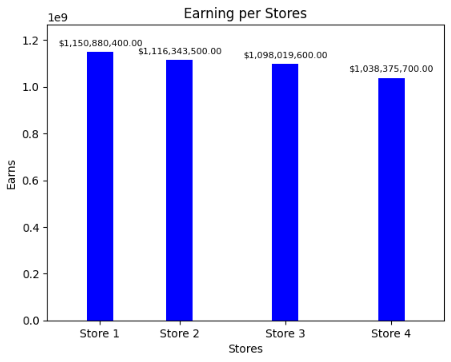

##### **Las categorías de productos más y menos vendidas.**

Resumen de Ventas por Categoría, tendencias generales (Todas las Tiendas):

El análisis de ventas_totales_categoria y el gráfico circular muestra que las categorías con mayores ventas en general son:
• Muebles (1886 ventas)
• Electrónicos (1772 ventas)
• Juguetes (1290 ventas)

Las categorías con menores ventas en general son:
• Artículos para el hogar (730 ventas)
• Libros (742 ventas)
• Instrumentos musicales (753 ventas)

Tendencias por Tienda:

• Tienda 1 : Las categorías más vendidas son Muebles (465) y Electrónicos (448). La menos vendida es Artículos para el hogar (171).

• Tienda 2 : Las categorías más vendidas son Muebles (442) y Electrónicos (422). La menos vendida es Artículos para el hogar (181).

• Tienda 3 : Las categorías más vendidas son Muebles (499) y Electrónicos (451). Las menos vendidas son Instrumentos musicales (177) y Artículos para el hogar (177).

• Tienda 4 : Las categorías más vendidas son Muebles (480) y Electrónicos (451). La menos vendida es Instrumentos musicales (170).

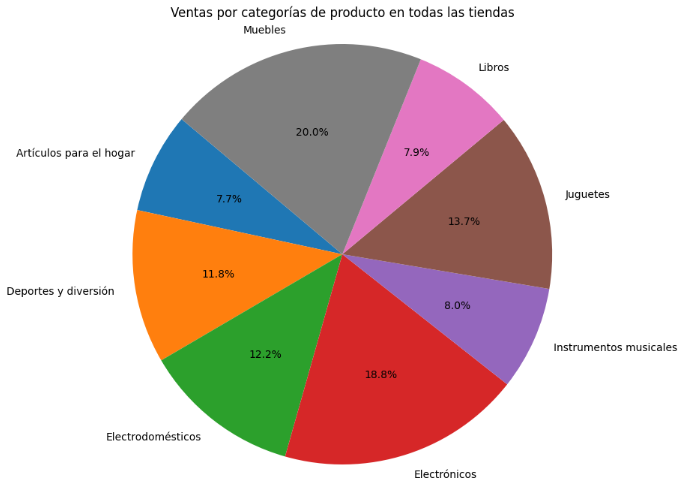


##### **Conclusiones sobre las Tendencias:**
• Muebles y Electrónicos son consistentemente las categorías de productos más populares y vendidas en todas las tiendas, indicando una fuerte demanda en estos sectores.
• Artículos para el hogar, Libros e Instrumentos musicales son consistentemente las categorías de productos menos vendidas en todas las tiendas. Esto podría sugerir áreas para optimización de inventario o estrategias de marketing mejoradas.

Análisis de Calificaciones Promedio por Tienda\

A continuación, se presentan las calificaciones promedio de los clientes para cada tienda:
• Tienda 1: 3.98%
• Tienda 2: 4.04%
• Tienda 3: 4.05%
• Tienda 4: 4.00%
De este análisis, se concluye que la Tienda 3 tiene la calificación promedio más alta con un 4.05%, lo que indica que es la tienda con mayor satisfacción del cliente.
Para una visualización detallada de la tendencia y comparación de las calificaciones entre las tiendas, consulte el gráfico de línea generado en la celda anterior.

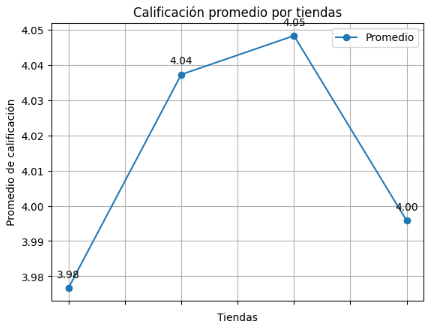


##### **Resumen de Productos Más y Menos Vendidos por Tienda**

A continuación, se detalla el producto más y menos vendido para cada una de las cuatro tiendas, junto con sus respectivas cantidades, basándose en el análisis de ventas y el gráfico generado:\

Tienda 1:
• Producto Más Vendido: Armario (60 ventas)
• Producto Menos Vendido: Celular ABXY (33 ventas)\

Tienda 2:
• Producto Más Vendido: Iniciando en programación (65 ventas)
• Producto Menos Vendido: Juego de mesa (32 ventas)\

Tienda 3:
• Producto Más Vendido: Kit de bancas (57 ventas)
• Producto Menos Vendido: Bloques de construcción (35 ventas)\

Tienda 4:
• Producto Más Vendido: Cama box (62 ventas)
• Producto Menos Vendido: Guitarra eléctrica (33 ventas)\

Patrones y Similitudes Observadas:\

• Productos Estrella: Los productos más vendidos varían significativamente entre las tiendas, abarcando categorías como muebles ("Armario", "Cama box", "Kit de bancas") y libros ("Iniciando en programación"). Esto sugiere una diversidad en el enfoque de inventario o en la demanda del cliente entre las distintas ubicaciones o estrategias de tienda.\

• Productos de Baja Demanda: De manera similar, los productos menos vendidos también son diversos, incluyendo electrónica ("Celular ABXY"), juguetes ("Juego de mesa", "Bloques de construcción") e instrumentos musicales ("Guitarra eléctrica"). No hay un patrón claro que indique una categoría consistentemente de baja venta en todas las tiendas.\

• Rango de Ventas: Las cantidades de ventas para los productos más vendidos oscilan entre 57 y 65 unidades, mientras que para los menos vendidos, el rango es más ajustado, entre 32 y 35 unidades. Esto indica que, aunque hay variaciones, la diferencia entre el producto más y menos vendido dentro de cada tienda no es extremadamente alta en términos absolutos de unidades.
El gráfico de barras visualiza claramente estas diferencias, mostrando las barras más altas y bajas para cada tienda, con las etiquetas de producto y cantidad confirmando los hallazgos.\

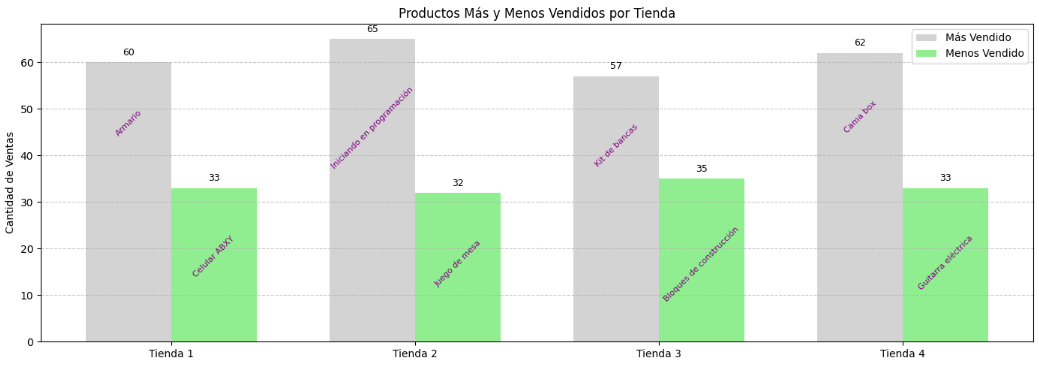

##### **Análisis Costo de Envío Promedio**

El costo de envío promedio para cada tienda es el siguiente:

• Tienda 1 : 26.018.61
• Tienda2 : 25.216.24
• Tienda 3 : 24.805.68
• Tienda4 : 23.459.46

La tienda con el costo de envío promedio más bajo es la Tienda 4, con un costo de 23.459.46.

Para una visualización detallada de estos costos, consulte el gráfico de barras con línea de tendencia.

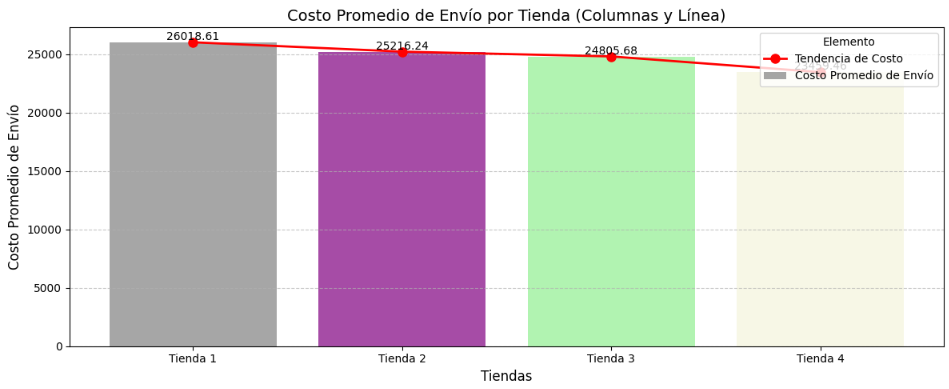

### **Recomendacion para para el Sr Juan**
Considerando todos los análisis, la Tienda 3 se presenta como la opción más adecuada para que el Sr. Juan venda sus productos.

**Justificación:**

La Tienda 3 destaca principalmente por su altísima satisfacción del cliente, reflejada en la calificación promedio más elevada (4.05%). Esto es crucial para un nuevo vendedor, ya que sugiere una base de clientes leales y una mayor probabilidad de que los productos del Sr. Juan sean bien recibidos y calificados positivamente. Además, esta tienda muestra un rendimiento excepcional en la categoría de Muebles (499 ventas), siendo la líder indiscutible en este segmento. Si los productos del Sr. Juan se alinean con esta categoría o con Electrónicos, la Tienda 3 ofrece una audiencia ya establecida y receptiva. Aunque su ingreso total no sea el más alto, la combinación de la mayor satisfacción del cliente y las fuertes ventas en categorías relevantes (Muebles y Electrónicos) proporciona un entorno más estable y favorable para el lanzamiento de nuevos productos y para construir una reputación sólida a largo plazo, superando el riesgo de los costos de envío más altos o la ligera menor calificación de otras tiendas.
Por el contrario, aunque la Tienda 1 tiene los mayores ingresos, su menor calificación de cliente y el costo de envío más alto representan riesgos. La Tienda 4, con los menores costos de envío, tiene los ingresos más bajos, lo que podría indicar un menor volumen de ventas general. La Tienda 2 es equilibrada, pero la Tienda 3 ofrece una ventaja clara en la percepción del cliente y volumen de ventas en categorías clave.
